In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import seaborn as sns
import re
from pathlib import Path
from pyvis.network import Network
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("new.csv", delimiter = ",", encoding = "ISO-8859-1")
data

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [8]:
d2015 = []
for i in range (data.shape[0]):
    d2015.append(data.iloc[i,5][3]=='5')
data2015 = data[d2015]
data2015

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
92861,https://bj.lianjia.com/chengjiao/BJ0000617614....,BJ0000617614,116.122150,39.932268,1111027378707,2015-01-01,1.0,0,138.0,20073,...,4.0,1997,4,2,0.500,0.0,0.0,0.0,12,35181.0
92862,https://bj.lianjia.com/chengjiao/BJ0000617617....,BJ0000617617,116.121964,39.939762,1111027375862,2015-01-01,1.0,0,430.0,24381,...,4.0,2002,4,2,0.500,0.0,0.0,0.0,12,37588.0
92863,https://bj.lianjia.com/chengjiao/BJ0000617620....,BJ0000617620,116.122354,39.937384,1111027376723,2015-03-16,1.0,0,139.0,17737,...,4.0,2000,3,2,0.500,0.0,0.0,0.0,12,36358.0
92864,https://bj.lianjia.com/chengjiao/BJ0000617622....,BJ0000617622,116.122491,39.939735,1111027377936,2015-03-15,1.0,0,219.0,25783,...,4.0,2008,3,6,0.500,1.0,0.0,0.0,12,39994.0
92865,https://bj.lianjia.com/chengjiao/BJ0000617625....,BJ0000617625,116.117724,39.941152,1111052110644,2015-03-07,1.0,0,105.0,23169,...,3.0,2006,4,6,0.125,1.0,0.0,0.0,12,39492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318395,https://bj.lianjia.com/chengjiao/BJYZ91171857....,BJYZ91171857,116.490411,39.798212,1111027374812,2015-12-20,NaN,3,163.0,27167,...,4.0,2002,3,2,0.333,0.0,1.0,0.0,3,51025.0
318411,https://bj.lianjia.com/chengjiao/BJYZ91207760....,BJYZ91207760,116.509391,39.774680,1111027379850,2015-12-30,NaN,4,142.0,20301,...,3.0,2009,3,6,0.333,1.0,0.0,0.0,3,42697.0
318412,https://bj.lianjia.com/chengjiao/BJYZ91211722....,BJYZ91211722,116.550348,39.755625,1111027381517,2015-12-28,NaN,2,274.0,18326,...,4.0,2006,4,6,0.500,0.0,1.0,0.0,3,33518.0
318424,https://bj.lianjia.com/chengjiao/BJYZ91257153....,BJYZ91257153,116.497474,39.810115,1111027377957,2015-12-31,1.0,4,348.0,37492,...,4.0,2009,4,6,0.500,1.0,0.0,1.0,3,54282.0


In [10]:
d2016 = []
for i in range (data.shape[0]):
    d2016.append(data.iloc[i,5][3]=='6')
data2016 = data[d2016]
data2016

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,...,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,...,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,...,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


In [12]:
d2017 = []
for i in range (data.shape[0]):
    d2017.append(data.iloc[i,5][3]=='7')
data2017 = data[d2017]
data2017

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
58,https://bj.lianjia.com/chengjiao/101089178771....,101089178771,116.284755,39.934530,1111027376911,2017-03-22,721.0,117,280.0,67470,...,1.0,2009,4,6,0.111,1.0,0.0,1.0,8,70141.0
60,https://bj.lianjia.com/chengjiao/101089194921....,101089194921,116.559275,40.113935,1111027379645,2017-01-22,659.0,81,530.0,26100,...,4.0,1998,4,6,0.500,0.0,1.0,0.0,13,42336.0
88,https://bj.lianjia.com/chengjiao/101089395900....,101089395900,116.606151,40.051276,1111027378571,2017-01-22,629.0,172,300.0,29127,...,4.0,1998,4,2,0.500,0.0,1.0,0.0,7,38468.0
135,https://bj.lianjia.com/chengjiao/101089617238....,101089617238,116.199293,39.938056,1111027380971,2017-03-09,637.0,198,391.0,39692,...,4.0,1996,3,2,0.333,0.0,1.0,0.0,9,42325.0
159,https://bj.lianjia.com/chengjiao/101089729154....,101089729154,116.308505,39.839489,1111027381703,2017-04-13,651.0,93,840.0,56900,...,1.0,2001,3,6,0.214,1.0,1.0,1.0,2,57372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92200,https://bj.lianjia.com/chengjiao/101102445381....,101102445381,116.358797,40.083529,1111027378215,2017-12-31,2.0,0,420.0,44610,...,4.0,2003,4,2,0.500,0.0,1.0,0.0,6,42145.0
92202,https://bj.lianjia.com/chengjiao/101102446302....,101102446302,116.426125,39.990760,1111027375354,2017-12-31,2.0,0,1300.0,48715,...,4.0,Î´Öª,1,6,0.333,0.0,0.0,1.0,7,70719.0
92204,https://bj.lianjia.com/chengjiao/101102446698....,101102446698,116.234832,40.223951,1111056464680,2017-12-31,1.0,0,157.0,33398,...,NaN,Î´Öª,1,1,0.333,0.0,0.0,1.0,6,40258.0
92205,https://bj.lianjia.com/chengjiao/101102447335....,101102447335,116.423905,39.791207,1111027374423,2017-12-31,1.0,0,413.0,46002,...,4.0,2010,1,6,0.500,1.0,0.0,0.0,4,44880.0


In [13]:
d2018 = []
for i in range (data.shape[0]):
    d2018.append(data.iloc[i,5][3]=='8')
data2018 = data[d2018]
data2018

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
65168,https://bj.lianjia.com/chengjiao/101101204062....,101101204062,116.328627,39.979037,1111027382321,2018-01-01,316.0,39,610.0,99511,...,4.0,1988,4,2,0.333,0.0,1.0,1.0,8,96866.0
74187,https://bj.lianjia.com/chengjiao/101101492812....,101101492812,116.349009,40.074638,1111027377718,2018-01-03,259.0,226,380.0,47560,...,4.0,2004,4,2,0.333,0.0,1.0,1.0,6,47958.0
74311,https://bj.lianjia.com/chengjiao/101101498405....,101101498405,116.504397,39.929410,1111027376016,2018-01-02,257.0,77,284.0,55350,...,4.0,1994,2,2,0.333,0.0,1.0,1.0,7,56893.0
75514,https://bj.lianjia.com/chengjiao/101101556380....,101101556380,116.366736,40.091609,1111027375384,2018-01-01,240.0,54,518.0,43684,...,4.0,2006,3,2,0.500,0.0,1.0,1.0,6,43641.0
75600,https://bj.lianjia.com/chengjiao/101101560100....,101101560100,116.320453,40.039032,1111046342806,2018-01-02,240.0,155,794.0,112354,...,4.0,1993,4,2,0.333,0.0,0.0,1.0,8,107251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92212,https://bj.lianjia.com/chengjiao/101102451232....,101102451232,116.415714,39.993021,1111027375672,2018-01-02,1.0,3,315.0,72199,...,1.0,1989,1,6,0.250,1.0,1.0,1.0,7,68049.0
92213,https://bj.lianjia.com/chengjiao/101102451242....,101102451242,116.355720,40.019180,1111027381533,2018-01-03,2.0,0,607.0,80729,...,1.0,2003,1,6,0.250,1.0,0.0,0.0,8,76934.0
92214,https://bj.lianjia.com/chengjiao/101102451325....,101102451325,116.673001,40.138289,1111027373964,2018-01-02,1.0,0,257.0,36341,...,4.0,1997,1,2,0.500,0.0,0.0,1.0,13,36286.0
92215,https://bj.lianjia.com/chengjiao/101102452309....,101102452309,116.439420,40.072066,1111027380051,2018-01-03,2.0,0,372.0,41822,...,4.0,2001,1,2,0.500,0.0,0.0,0.0,6,40934.0


In [14]:
d2014 = []
for i in range (data.shape[0]):
    d2014.append(data.iloc[i,5][3]=='4')
data2014 = data[d2014]
data2014

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
92751,https://bj.lianjia.com/chengjiao/BJ0000617124....,BJ0000617124,116.117724,39.941152,1111052110644,2014-01-03,1.0,0,112.0,26422,...,3.0,2006,4,6,0.250,1.0,0.0,0.0,12,39492.0
92752,https://bj.lianjia.com/chengjiao/BJ0000617139....,BJ0000617139,116.117724,39.941152,1111052110644,2014-01-12,1.0,0,136.0,23449,...,3.0,2006,4,6,0.125,1.0,0.0,0.0,12,39492.0
92753,https://bj.lianjia.com/chengjiao/BJ0000617145....,BJ0000617145,116.122354,39.937384,1111027376723,2014-01-17,1.0,0,365.0,25062,...,4.0,2000,3,2,0.500,0.0,0.0,0.0,12,36358.0
92754,https://bj.lianjia.com/chengjiao/BJ0000617148....,BJ0000617148,116.121964,39.939762,1111027375862,2014-01-18,1.0,0,209.0,22437,...,4.0,2003,3,6,0.333,1.0,0.0,0.0,12,37588.0
92755,https://bj.lianjia.com/chengjiao/BJ0000617150....,BJ0000617150,116.118409,39.937888,1111043529456,2014-01-19,1.0,0,370.0,24174,...,4.0,2006,4,6,0.333,1.0,0.0,0.0,12,38753.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317581,https://bj.lianjia.com/chengjiao/BJYZ88630091....,BJYZ88630091,116.508181,39.807662,1111027374693,2014-12-25,NaN,1,134.0,25203,...,1.0,2008,1,6,0.200,1.0,0.0,1.0,3,28609.0
317585,https://bj.lianjia.com/chengjiao/BJYZ88655477....,BJYZ88655477,116.500382,39.805889,1111027373716,2014-12-14,1.0,0,120.0,23069,...,3.0,2002,1,6,0.250,1.0,1.0,1.0,3,46609.0
317588,https://bj.lianjia.com/chengjiao/BJYZ88661953....,BJYZ88661953,116.524034,39.828866,1111040862975,2014-12-30,NaN,1,220.0,24224,...,3.0,2010,2,6,0.500,1.0,0.0,0.0,4,49524.0
317590,https://bj.lianjia.com/chengjiao/BJYZ88664180....,BJYZ88664180,116.457814,39.770511,1111027380884,2014-12-26,NaN,0,180.0,18790,...,3.0,2004,3,6,0.250,1.0,1.0,0.0,4,38959.0


In [16]:
data2014['price'].median()

35222.5

In [34]:
d2010 = []
for i in range (data.shape[0]):
    d2010.append(data.iloc[i,5][3]=='0')
data2010 = data[d2010]
data2010['price'].median()

15380.0

In [35]:
d2011 = []
for i in range (data.shape[0]):
    d2011.append(data.iloc[i,5][3]=='1')
data2011 = data[d2011]
data2011['price'].median()

21535.5

In [37]:
d2012 = []
for i in range (data.shape[0]):
    d2012.append(data.iloc[i,5][3]=='2')
data2012 = data[d2012]
data2012['price'].median()

24870.5

In [36]:
d2013 = []
for i in range (data.shape[0]):
    d2013.append(data.iloc[i,5][3]=='3')
data2013 = data[d2013]
data2013['price'].median()

33369.5

In [17]:
data2015['price'].median()

35922.0

In [18]:
data2016['price'].median()

45627.0

In [19]:
data2017['price'].median()

62331.0

In [20]:
data2018['price'].median()

54740.5

In [38]:
years = ["2010", "2011", "2012", "2013","2014", "2015", "2016", "2017", "2018"]
median = [15380.0, 21535.5, 24870.5, 33369.5, 35222.5,35922.0,45627.0, 62331.0, 54740.5]

Text(0, 0.5, 'Price per square feet - Yuan')

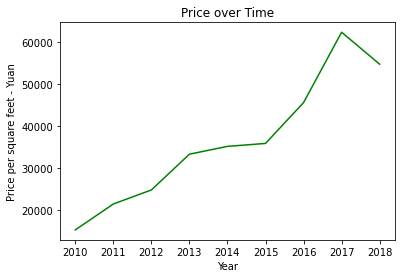

In [39]:
plt.plot(years, median, color = 'green')
plt.title("Price over Time")
plt.xlabel("Year")
plt.ylabel("Price per square feet - Yuan")